<a href="https://colab.research.google.com/github/ritikraj660/Color-Image-Processing/blob/master/Exploratory_Data_Analysis_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Terminology



*   What is EDA?
*   Data-point/vector/Observation
*   Data-set
*   Feature/variable/Input-variable/Dependent-variable
*   Label/Independent-variable/Output-variable/Class/Class-label/Response label
*   Vector :2-D,3-D,4-D,---,nD

Q. What is a 1-D vector: Scaler







**Iris Flower Data-sets**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
iris=pd.read_csv("iris.csv")

In [0]:
iris.head(1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


In [0]:
# Q. How many data-point and features?
print(iris.shape)

(150, 5)


In [0]:
# Q. What are the column names in our dataset?
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [0]:
# Q. How many data points for each class are present?
# (or) How many flowers for each species are present?
iris["variety"].value_counts()
# Balanced-dataset vs imbalanced datasets
# iris is a balanced dataset as the number of data points for every class is same.

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

# 2-D Scatter Plot

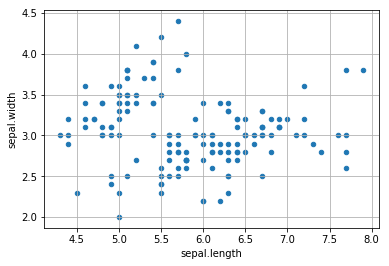

In [0]:
# 2-D scatter plot:
# Always understand the axis : labels and scale.
iris.plot(kind='scatter',x='sepal.length',y='sepal.width')
plt.grid()
plt.show()
# cannot make much sense out it.
# what if we color the pooints by thier class-label/flower-type.

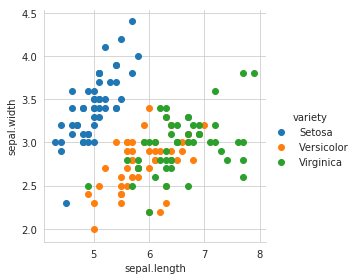

In [0]:
# 2-D Scatter plot with color-coding for each flower type/class.
# here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="variety",height=4) \
     .map(plt.scatter,"sepal.length","sepal.width") \
     .add_legend();
plt.show();
# Notice that the blue points can be easily seperated
# from red and green by drawing a line.
# But red and green data points cannot be easily seperated.
# can we draw multiple 2-D scatter plots for each combination of features?
# How many combination exist? 4c2=6

**Observation(s) :**

 

1.   Using sepal.length and sepal.width features, we can distinguish Setosa
     flowers from others.
2.   Seperating vericolor from viginica is much harder as they have                  considerable overlap.



# 3-D Scatter Plot

https://plot.ly/pandas/3d-scatter-plots/

# Pair Plot

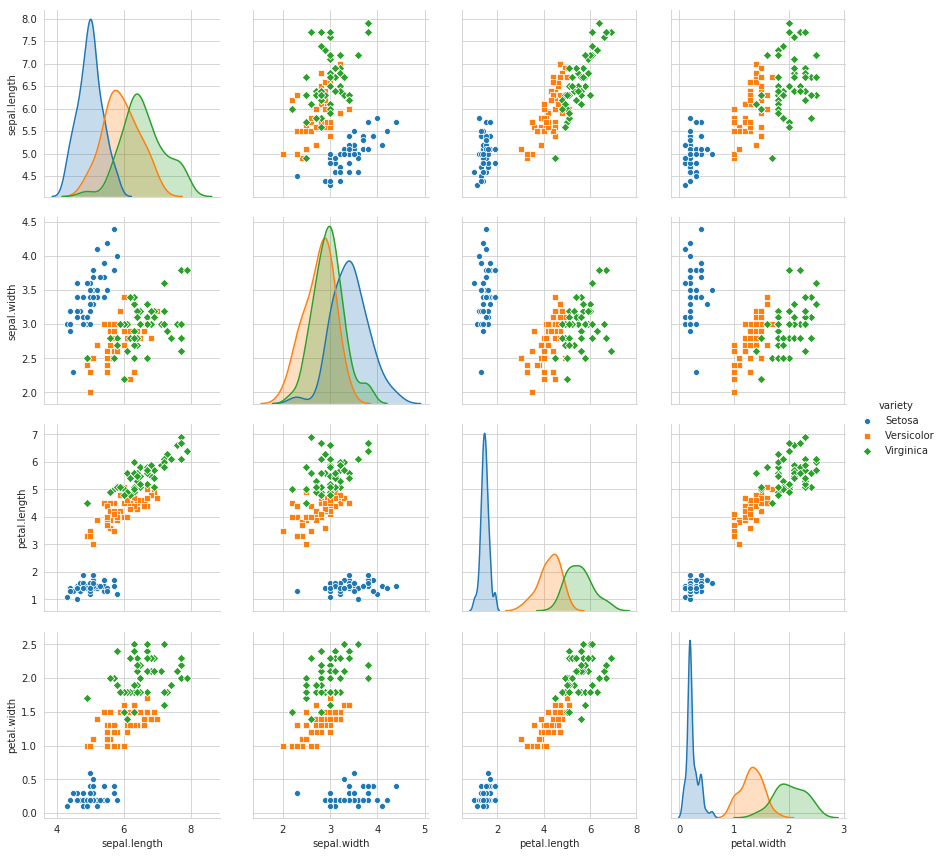

In [0]:
# pairwise scatter plot : Pair-plot
# Dis-advantages :
#  Can be used when number of features are high.
#  cannot visualize higher dimensional patterns in 3-D and 4-D.
#Only possible to view 2D patterns.

plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris,hue="variety",height=3,markers=["o", "s", "D"]);
# kind : {‘scatter’, ‘reg’} , diag_kind : {‘auto’, ‘hist’, ‘kde’}
# sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()
# NOTE : the diagonal elements are PDFs for each feature.

**Observations :**


1.   petal.length and petal.width are the most useful features to identify various flower types.
2.   While setosa can be easily identified (linearly seperable), Virnica and Versicolor have some
     overlap(almost linearly seperable)



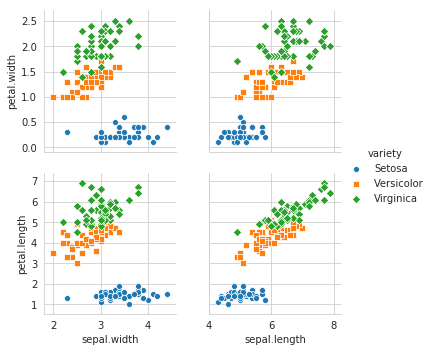

In [0]:
g = sns.pairplot(iris,hue="variety",x_vars=["sepal.width", "sepal.length"],y_vars=["petal.width", "petal.length"] 
                 ,markers=["o", "s", "D"])

In [0]:
#g = sns.pairplot(iris,hue="variety", kind="reg")

# Histogram, PDF, CDF

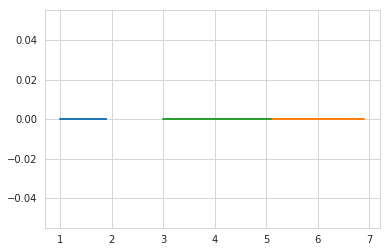

In [0]:
# what about 1-D scatter plot using just one feature?
# 1-D scatter plot of petal-length
import numpy as np
iris_setosa=iris.loc[iris["variety"] == "Setosa"];
iris_verginica=iris.loc[iris["variety"] == "Virginica"];
iris_versicolor=iris.loc[iris["variety"] == "Versicolor"];
#print(iris_setosa["petal.length"])
plt.plot(iris_setosa["petal.length"],np.zeros_like(iris_setosa['petal.length']));
plt.plot(iris_verginica["petal.length"],np.zeros_like(iris_verginica['petal.length']));
plt.plot(iris_versicolor["petal.length"],np.zeros_like(iris_versicolor['petal.length']));
plt.show()
# Dis-advantages of 1-D scatter plot : very hard to make sense as points are overlapping a lot.
# Are there better ways of visualizing 1-D scatter plots?

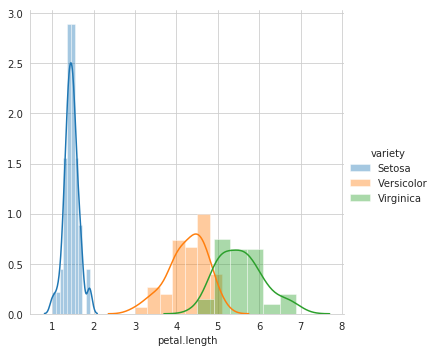

In [0]:
sns.FacetGrid(iris, hue="variety", height=5).map(sns.distplot,"petal.length").add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


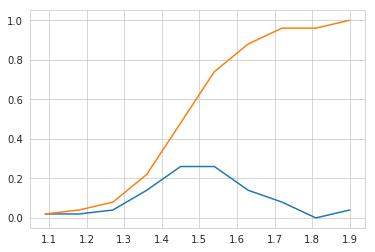

In [0]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a petal.length of less than 5?
# How to construct a CDF?
# How to read a CDF?
#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

plt.show()

#counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=20,density=True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);
# Blue line is PDF | Orange line is CDF 
# (*)there are 82% of setosa flower that have petal.length<=1.6
# (vertical probabilty)(horizontal petal.length)
# CDF equals to area under curve in PDF at that point.

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


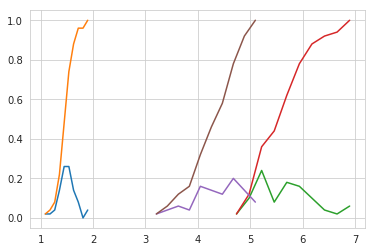

In [0]:
#***************** Setosa**************************
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

#*******************Verginica************************
counts, bin_edges = np.histogram(iris_verginica['petal.length'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

#*******************Versicolor***********************
counts, bin_edges = np.histogram(iris_versicolor['petal.length'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
#******************************************************
plt.show()

# Mean, Variance and Std-dev

In [0]:
# Mean, variance, std-deviation,
print("means:")
print(np.mean(iris_setosa["petal.length"]))

# Mean with an outlier
print(np.mean(np.append(iris_setosa["petal.length"],50)))
print(np.mean(iris_verginica["petal.length"]))
print(np.mean(iris_versicolor["petal.length"]))

print("\n Std-dev : ")
print(np.std(iris_setosa["petal.length"]))
print(np.std(iris_verginica["petal.length"]))
print(np.std(iris_versicolor["petal.length"]))

means:
1.4620000000000002
2.4137254901960787
5.552
4.26

 Std-dev : 
0.17191858538273286
0.5463478745268441
0.4651881339845204


# Median, Percentile, Quantile, IQR, MAD

1.   IQR : Inter Quatile Range
2.   MAD : Median absolute Deviation 

In [0]:
# Median, Quantiles, Percentages, IQR
print("\n Medians :")#sort the number in any order and pick the middle one.
print(np.median(iris_setosa["petal.length"]))
# Median with an outlier
# NOTE : more than 50% datapoints corrupted only then median gets corrupted.
print(np.median(np.append(iris_setosa["petal.length"],50)));
print(np.median(iris_verginica["petal.length"]))
print(np.median(iris_versicolor["petal.length"]))

print("Quantiles :")#
print(np.percentile(iris_setosa["petal.length"],np.arange(0,100,25)))
print(np.percentile(iris_verginica["petal.length"],np.arange(0,100,25)))
print(np.percentile(iris_versicolor["petal.length"],np.arange(0,100,25)))

print("90th Percentiles :")
print(np.percentile(iris_setosa["petal.length"],90))
print(np.percentile(iris_verginica["petal.length"],90))
print(np.percentile(iris_versicolor["petal.length"],90))

from statsmodels import robust
print("Median Absolute Deviation")
#  median of [Xi-median]from i=1 to N
print(robust.mad(iris_setosa["petal.length"])) 
print(robust.mad(iris_verginica["petal.length"]))
print(robust.mad(iris_versicolor["petal.length"]))


 Medians :
1.5
1.5
5.55
4.35
Quantiles :
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]
90th Percentiles :
1.7
6.3100000000000005
4.8
Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box Plot and Whiskers

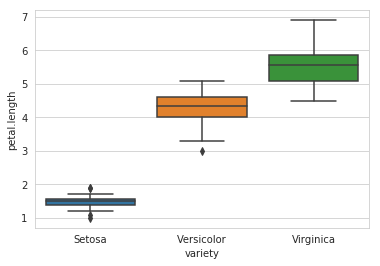

In [0]:
# Box-plot with whiskers : Another method of visualizing the 1-D scateer plot
 # The Concept of median, percentile, quantile.
 # How to draw the box in the box-plot?
 # How to draw whiskers: [no standard way] could use min and max or use other
 # IQR like idea.

 #NOTE: In the plot below, a technique call inter-quartile range is used in
 # Whiskers in the plot below do not correspond to the min and max values.

 #Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='variety' , y='petal.length' , data=iris)
plt.show()

# Violin Plots

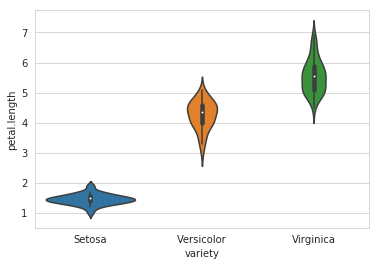

In [0]:
# A violin plot combines the benefits of the previous two plots and simplified them
# Denser regions of the data are fatter, and sparser ones thnner in a violin plot

sns.violinplot(x="variety" ,y="petal.length",data=iris,size=8)
plt.show()

# Multivariate Probability Density, Contour Plot.

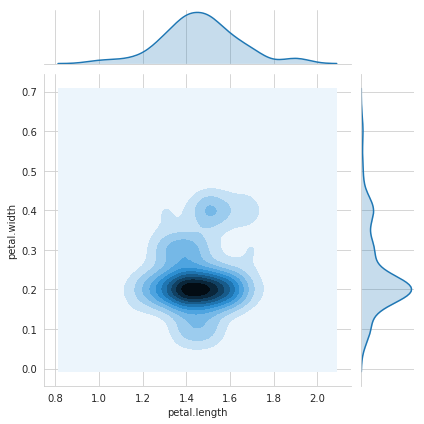

In [0]:
#2-D Density plot, contour-plot
sns.jointplot(x="petal.length",y="petal.width",data=iris_setosa, kind="kde");
plt.show();